<a href="https://colab.research.google.com/github/LuciferX45/Signal-Image-Processing-Labs/blob/main/SIP_SELF_EXPERIMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SIP SELF EXPERIMENT**
# **Gautam Padhi**
# I034 B2
# BTech AI SEM IV


##**QUESTION STATEMENT:**
Perform the following operations in the same order as given below to any image of your choice:

1)Change to 6 different colors and display in subplots

2)Downsampling the image

3)Apply a bilateral filter(Bilateral filtering is a weighted filter kernel with a better outlier rejection. Instead of rejecting a fixed percentage, we reject (in a soft way) pixels whose values differ too much from the central pixel value.)

4)Take the orginal image or the color modified image and apply the vignette effect(The vignette is essentially a darkening of pixels towards the outer edges of the image )


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread('img.jpg')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

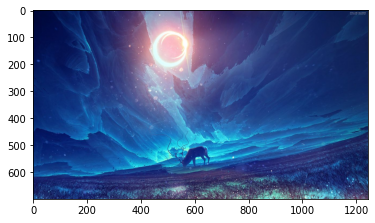

In [ ]:
plt.imshow(rgb_img)

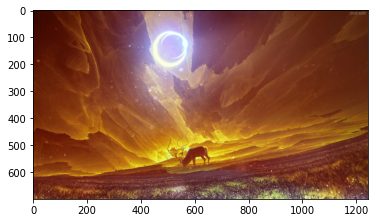

In [ ]:
plt.imshow(img)

### Q1

<Figure size 1440x1440 with 0 Axes>

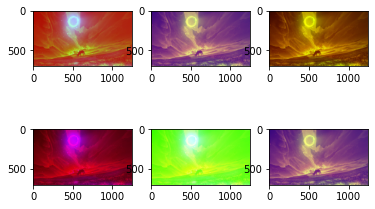

In [ ]:
red1 = np.copy(img)
red2 = np.copy(img)
red3 = np.copy(img)
red1[:,:,0] = 175 
red2[:,:,1]= 255
red3[:,:,1] = 0

plt.figure(figsize=(20,20))
fy,ax=plt.subplots(2,3)
ax[0,0].imshow(red1)
ax[1,1].imshow(red2)
ax[1,0].imshow(red3)

blue0 = np.copy(img)
blue0[:,:,2] = 125  
blue1 = np.copy(img)
blue1[:,:,2] = 0  
blue2 = np.copy(img)
blue2[:,:,0] = 0 

ax[0,1].imshow(blue0)
ax[0,2].imshow(blue1)
ax[1,2].imshow(blue2)
plt.imshow(blue0)

### Q2

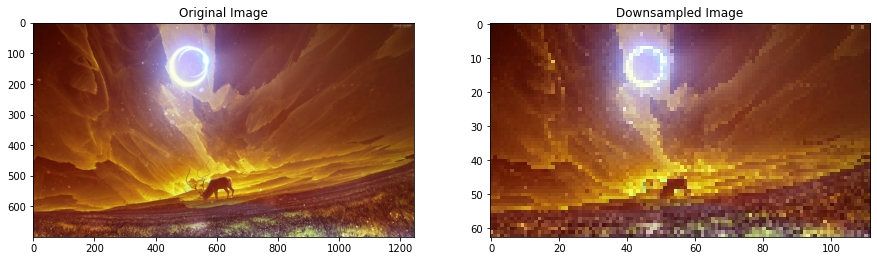

In [ ]:
img2 = cv2.imread('img.jpg')
res = cv2.resize(img2, None, fx=0.09, fy=0.09, interpolation = cv2.INTER_CUBIC)

plt.figure(figsize=(15,12))

plt.subplot(121)
plt.imshow(img2,cmap = 'gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(res,cmap = 'gray')
plt.title('Downsampled Image')

plt.show()

### Q3

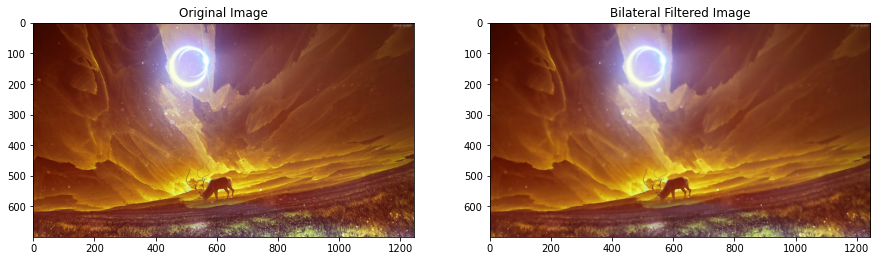

In [ ]:
blur = cv2.bilateralFilter(img2,9,75,75)

plt.figure(figsize=(15,12))

plt.subplot(121)
plt.imshow(img2,cmap = 'gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(blur,cmap = 'gray')
plt.title('Bilateral Filtered Image')

plt.show()

### Q4

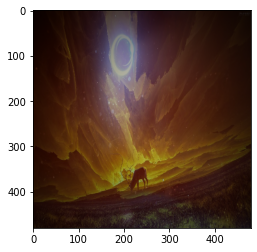

In [ ]:
#reading the image
input_image = cv2.imread('img.jpg')
input_image = cv2.resize(input_image, (480, 480))

# Extracting the height and width of an image
rows, cols = input_image.shape[:2]

# generating vignette mask using Gaussian
# resultant_kernels
X_resultant_kernel = cv2.getGaussianKernel(cols,200)
Y_resultant_kernel = cv2.getGaussianKernel(rows,200)

#generating resultant_kernel matrix
resultant_kernel = Y_resultant_kernel * X_resultant_kernel.T

#creating mask and normalising by using np.linalg
# function
mask = 255 * resultant_kernel / np.linalg.norm(resultant_kernel)
output = np.copy(input_image)

# applying the mask to each channel in the input image
for i in range(3):
	output[:,:,i] = output[:,:,i] * mask
	
#displaying the original image
plt.imshow(input_image)

#displaying the vignette filter image
plt.imshow(output)
